# **(optional) Preprocessing download dataset images and clean table rows**

In [ ]:
## IMPORTANT: The following files/folders must be present in the current directory before running pre-processing
#
# 1. final_data.csv
# 2. cs230_numerical.csv
# 3. /listings folder containing .json files

In [ ]:
# Install grequests for fast-async requests to download images
!pip install grequests
import grequests

In [ ]:
# Patch to fix bug and remove extra logging each time grequests is uses
import sys
del sys.modules["grequests"]
del grequests
del sys.modules["gevent.monkey"]

In [ ]:
# Now, reinstall grequests
!pip install grequests
import grequests

In [ ]:
%env GEVENT_SUPPORT=True

env: GEVENT_SUPPORT=True


In [ ]:
final_df = pd.read_csv('final_data.csv') # 2986 rows
cs230_df = pd.read_csv('cs230_numerical.csv').drop('Unnamed: 0', axis=1) # 647 rows

In [ ]:
# Original CS230 df specs
print(cs230_df.columns, len(cs230_df.columns))

Index(['name', 'city', 'Width', 'Height', 'Brightness', 'Color', 'Dominate',
       'description', 'stars', 'price', 'rating', 'reviews', 'image', 'images',
       'categoryReviews', 'userReviews', 'staff', 'facilities', 'cleanliness',
       'comfort', 'valueForMoney', 'location', 'albuquerque', 'austin',
       'baltimore', 'bonston', 'calgary', 'charlotte', 'chicago', 'columbus',
       'dallas', 'denver', 'detroit', 'el_paso', 'fort_worth', 'fresno',
       'houston', 'indianapolis', 'jacksonville', 'kansas', 'las_vegas',
       'los_angeles', 'louiseville', 'memphis', 'mesa', 'milwaukee',
       'montreal', 'nashville', 'new_york', 'oklahoma_city', 'orlando',
       'philadelphia', 'phoenix', 'portland', 'sacramento', 'san_antonio',
       'san_diego', 'san_francisco', 'san_jose', 'seattle', 'toronto',
       'tucson', 'washington_dc', 'c1', 'c2', 'c3', 'd1', 'd2', 'd3',
       'travelweekly_year_built', 'travelweekly_num_floors',
       'travelweekly_num_rooms', 'travelweekly_cha

In [ ]:
img_updated_rows = []
for index, row in cs230_df.iterrows():
  clean_images_np = []
  img_list = row['images'][2:-2].split("', '")

  rs = (grequests.get(iurl, timeout=2.5) for iurl in img_list)
  mapped = grequests.map(rs)

  for res in mapped:
    if res.status_code == 200:
      clean_images_np.append(np.array(Image.open(BytesIO(res.content))))

  print('Fetched', len(clean_images_np), 'images for row', index)
  img_updated_rows.append(row.to_list() + [clean_images_np[:10]])

Fetched 9 images for row 0
Fetched 52 images for row 1
Fetched 50 images for row 2
Fetched 45 images for row 3
Fetched 36 images for row 4
Fetched 37 images for row 5
Fetched 27 images for row 6
Fetched 52 images for row 7
Fetched 53 images for row 8
Fetched 18 images for row 9
Fetched 38 images for row 10
Fetched 3 images for row 11
Fetched 2 images for row 12
Fetched 48 images for row 13
Fetched 26 images for row 14
Fetched 20 images for row 15
Fetched 52 images for row 16
Fetched 10 images for row 17
Fetched 10 images for row 18
Fetched 45 images for row 19
Fetched 6 images for row 20
Fetched 22 images for row 21
Fetched 37 images for row 22
Fetched 24 images for row 23
Fetched 43 images for row 24
Fetched 46 images for row 25
Fetched 44 images for row 26
Fetched 24 images for row 27
Fetched 12 images for row 28
Fetched 43 images for row 29
Fetched 47 images for row 30
Fetched 2 images for row 31
Fetched 3 images for row 32
Fetched 2 images for row 33
Fetched 15 images for row 34
Fe

In [ ]:
images_df = pd.DataFrame(img_updated_rows, columns=['name', 'city', 'Width', 'Height', 'Brightness', 'Color', 'Dominate',
       'description', 'stars', 'price', 'rating', 'reviews', 'image', 'images',
       'categoryReviews', 'userReviews', 'staff', 'facilities', 'cleanliness',
       'comfort', 'valueForMoney', 'location', 'albuquerque', 'austin',
       'baltimore', 'bonston', 'calgary', 'charlotte', 'chicago', 'columbus',
       'dallas', 'denver', 'detroit', 'el_paso', 'fort_worth', 'fresno',
       'houston', 'indianapolis', 'jacksonville', 'kansas', 'las_vegas',
       'los_angeles', 'louiseville', 'memphis', 'mesa', 'milwaukee',
       'montreal', 'nashville', 'new_york', 'oklahoma_city', 'orlando',
       'philadelphia', 'phoenix', 'portland', 'sacramento', 'san_antonio',
       'san_diego', 'san_francisco', 'san_jose', 'seattle', 'toronto',
       'tucson', 'washington_dc', 'c1', 'c2', 'c3', 'd1', 'd2', 'd3',
       'travelweekly_year_built', 'travelweekly_num_floors',
       'travelweekly_num_rooms', 'travelweekly_chain',
       'travelweekly_events_num_rooms', 'travelweekly_events_total_sqft',
       'travelweekly_min_rate', 'travelweekly_max_rate', 'num_room_types',
       'standard_room_sqft', 'np_images_ten'])
filtered_imgs_df = images_df[images_df['np_images_ten'].map(len) > 0]

# imgs_df.to_csv('cs230_w_images.csv')
print(filtered_imgs_df)
filtered_imgs_df.to_pickle('cs230_w_images.pickle.gzde', compression='gzip')

                                                  name           city  Width  \
0                        Sheraton Centre Toronto Hotel        toronto   1024   
1                 Executive Hotel Cosmopolitan Toronto        toronto   1024   
2                                  Bisha Hotel Toronto        toronto   1024   
3    Holiday Inn Toronto Downtown Centre, an IHG Hotel        toronto   1024   
4                     Delta Hotels by Marriott Toronto        toronto   1024   
..                                                 ...            ...    ...   
642  Holiday Inn Louisville Airport South, an IHG H...    louiseville   1024   
643  Holiday Inn Express Louisville Airport Expo Ce...    louiseville   1024   
644  Candlewood Suites Louisville Airport, an IHG H...    louiseville   1024   
645  Crowne Plaza Louisville Airport Expo Center, a...    louiseville   1024   
646   Kimpton Hotel Monaco Washington DC, an IHG Hotel  washington_dc   1008   

     Height  Brightness                

In [ ]:
!gdown https://drive.google.com/uc?id=1uxjNcf52IyvCoURJ0nH0riUJ_8NYI8-h

In [3]:
imgs_df = pd.read_pickle('cs230_w_images.pickle.gzde', compression='gzip') # imgs_df = filtered_imgs_df
imgs_df = imgs_df[imgs_df['np_images_ten'].map(len) >= 4]

In [4]:
# Need to fix ['stars', 'rating', 'reviews', 'staff', 'facilities', 'cleanliness', 'comfort', 'valueForMoney', 'location']
last_city = ''
hotels_data = []
denorm_df_rows = []

for row_index, row in imgs_df.iterrows():
  fixed_row = []

  if row['city'] != last_city:
    last_city = row['city']
    with open(f"listings/{row['city']}_hotels.json", 'r') as file:
      hotels_data = json.load(file)

  for hotel in hotels_data:
    if hotel['name'] == row['name']:
      staff = [e["score"] for e in hotel['categoryReviews'] if e['title'] == "Staff"][0]
      facilities = [e["score"] for e in hotel['categoryReviews'] if e['title'] == "Facilities"][0]
      cleanliness = [e["score"] for e in hotel['categoryReviews'] if e['title'] == "Cleanliness"][0]
      comfort = [e["score"] for e in hotel['categoryReviews'] if e['title'] == "Comfort"][0]
      valueForMoney = [e["score"] for e in hotel['categoryReviews'] if e['title'] == "Value for money"][0]
      location = [e["score"] for e in hotel['categoryReviews'] if e['title'] == "Location"][0]
      fixed_row = [hotel['stars'], hotel['rating'], hotel['reviews'], staff, facilities, cleanliness, comfort, valueForMoney, location]

  denorm_df_rows.append(row.to_list() + fixed_row)

In [5]:
fixed_df = pd.DataFrame(denorm_df_rows, columns=['name', 'city', 'Width', 'Height', 'Brightness', 'Color', 'Dominate',
       'description', 'stars', 'price', 'rating', 'reviews', 'image', 'images',
       'categoryReviews', 'userReviews', 'staff', 'facilities', 'cleanliness',
       'comfort', 'valueForMoney', 'location', 'albuquerque', 'austin',
       'baltimore', 'bonston', 'calgary', 'charlotte', 'chicago', 'columbus',
       'dallas', 'denver', 'detroit', 'el_paso', 'fort_worth', 'fresno',
       'houston', 'indianapolis', 'jacksonville', 'kansas', 'las_vegas',
       'los_angeles', 'louiseville', 'memphis', 'mesa', 'milwaukee',
       'montreal', 'nashville', 'new_york', 'oklahoma_city', 'orlando',
       'philadelphia', 'phoenix', 'portland', 'sacramento', 'san_antonio',
       'san_diego', 'san_francisco', 'san_jose', 'seattle', 'toronto',
       'tucson', 'washington_dc', 'c1', 'c2', 'c3', 'd1', 'd2', 'd3',
       'travelweekly_year_built', 'travelweekly_num_floors',
       'travelweekly_num_rooms', 'travelweekly_chain',
       'travelweekly_events_num_rooms', 'travelweekly_events_total_sqft',
       'travelweekly_min_rate', 'travelweekly_max_rate', 'num_room_types',
       'standard_room_sqft', 'np_images_ten', 'f_stars', 'f_rating', 'f_reviews', 'f_staff', 'f_facilities', 'f_cleanliness', 'f_comfort', 'f_valueForMoney', 'f_location'])

In [7]:
# Get indexes of rows with bad data (star class should be between 1-5)
index_list = fixed_df[fixed_df.f_stars == 6].index.tolist()
print(index_list)

[262, 271, 290, 312]


In [8]:
imgs_df = imgs_df.drop(imgs_df.index[index_list]).reset_index(drop=True)
fixed_df = fixed_df.drop(fixed_df.index[index_list]).reset_index(drop=True)

In [9]:
tabular_df = fixed_df[['f_stars', 'f_rating', 'f_reviews',
       'f_staff', 'f_facilities', 'f_cleanliness',
       'f_comfort', 'f_valueForMoney', 'f_location',
       'travelweekly_year_built', 'travelweekly_num_floors',
       'travelweekly_num_rooms',
       'travelweekly_events_num_rooms', 'travelweekly_events_total_sqft',
       'travelweekly_min_rate', 'travelweekly_max_rate', 'num_room_types',
       'standard_room_sqft']]

In [10]:
print(len(tabular_df), len(imgs_df))
print(len(tabular_df.columns))

466 466
18


In [11]:
nan_indexes = tabular_df[tabular_df.isna().any(axis=1)].index

imgs_df = imgs_df.drop(imgs_df.index[nan_indexes]).reset_index(drop=True)
tabular_df = tabular_df.drop(tabular_df.index[nan_indexes]).reset_index(drop=True)
print(len(tabular_df), len(imgs_df))
print(len(tabular_df.columns))

298 298
18


In [12]:
imgs_df[['np_images_ten']].to_pickle('imgs_df.pickle.gzde', compression='gzip') # saved to 1sjcMEd6UfNyrFSdcyf7ZZEkyPZdbZBr2
tabular_df.to_pickle('tabular_df.pickle.gzde', compression='gzip') # saved to 1f-EiqI0UEcWD0OT_9UP74SDUzpn1J9XA

In [ ]:
#
# Dataset is successfully built! You can now move on to building the model(s).
#

# **minprice Prediction Using Multimodal Dataset**
Using the custom dataset, predict minprice using keras and tensorflow

In [5]:
# Import useful libraries for data processing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from io import BytesIO
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import json
import ast
import cv2

1. Install gdown lib
2. Download the model's custom img dataset to 'imgs_df.pickle.gzde'
3. Download the model's custom tabular dataset to 'tabular_df.pickle.gzde'

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1sjcMEd6UfNyrFSdcyf7ZZEkyPZdbZBr2 #imgs_df
!gdown https://drive.google.com/uc?id=1f-EiqI0UEcWD0OT_9UP74SDUzpn1J9XA #tabular_df

Downloading...
From: https://drive.google.com/uc?id=1f-EiqI0UEcWD0OT_9UP74SDUzpn1J9XA
To: /content/tabular_df.pickle.gzde
100% 9.28k/9.28k [00:00<00:00, 42.3MB/s]


First, load the downloaded imgs_df and tabular_df

In [ ]:
# Load dfs
imgs_df = pd.read_pickle('imgs_df.pickle.gzde', compression='gzip')
tabular_df = pd.read_pickle('tabular_df.pickle.gzde', compression='gzip')

The imgs_df contains a row, np_images_ten with images in numpy array format

Stitch images into images_output list or np arrays

In [8]:
images_output = []
for row_index, row in imgs_df.iterrows():
    stitched_image = np.zeros((256, 256, 3), dtype="uint8")
    individual_images = []

    for np_img in row['np_images_ten'][:4]:
      individual_images.append(np.array(cv2.resize(np_img, (128 , 128))))

    stitched_image[0:128, 0:128] = individual_images[0]
    stitched_image[0:128, 128:256] = individual_images[1]
    stitched_image[128:256, 0:128] = individual_images[2]
    stitched_image[128:256, 128:256] = individual_images[3]

    images_output.append(stitched_image)

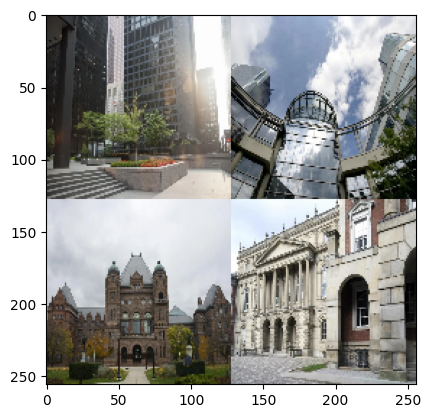

In [14]:
# Visualize the stitched image for the first n=1 rows
for i in images_output[:1]:
    plt.imshow(i)

In [15]:
# Log individual image shape and collective image array dimensions
print('Stitched image shape:', images_output[1].shape)
img_arr = np.stack(images_output, dtype="object", axis=0)
print('Array of stitched images shape:', img_arr.shape)

Stitched image shape: (256, 256, 3)
Array of stitched images shape: (298, 256, 256, 3)


# Import libraries for building and training the model

In [36]:
from sklearn import metrics, datasets, linear_model, preprocessing, utils
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, Conv2D, MaxPooling2D, MaxPool2D, Embedding, Input, concatenate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure, show
from keras.models import Sequential, Model
from keras.preprocessing import sequence
from keras.utils import plot_model
from keras.optimizers import Adam
from keras import optimizers
import tensorflow as tf
import keras
import glob

In [89]:
# Split the data into training and dev+test sets, for both tabular data and image data
# dev+test sets will then be split into a dev set and a test set
x_tabular_train, x_tabular_devtest, x_images_train, x_images_devtest = train_test_split(tabular_df, img_arr, test_size=0.15, random_state=1)
x_tabular_dev, x_tabular_test, x_images_dev, x_images_test = train_test_split(x_tabular_devtest, x_images_devtest, test_size=0.1, random_state=1)

# Log dataset shapes
print('x_tabular_train shape =', x_tabular_train.shape)
print('x_tabular_dev shape =', x_tabular_dev.shape)
print('x_tabular_test shape =', x_tabular_test.shape)
print('---------------------------------------------')
print('x_images_train shape =', x_images_train.shape)
print('x_images_dev shape =', x_images_dev.shape)
print('x_images_test shape =', x_images_test.shape)

x_tabular_train shape = (253, 18)
x_tabular_dev shape = (40, 18)
x_tabular_test shape = (5, 18)
---------------------------------------------
x_images_train shape = (253, 256, 256, 3)
x_images_dev shape = (40, 256, 256, 3)
x_images_test shape = (5, 256, 256, 3)


In [90]:
# Initialize y sets and convert all values to float32 format
y_train = np.asarray(x_tabular_train[['travelweekly_min_rate']].values).astype(np.float32)
y_dev = np.asarray(x_tabular_dev[['travelweekly_min_rate']].values).astype(np.float32)
y_test = np.asarray(x_tabular_test[['travelweekly_min_rate']].values).astype(np.float32)

In [91]:
# Drop output columns from x sets and get values
x_tabular_train = x_tabular_train.drop(['f_stars', 'travelweekly_min_rate', 'travelweekly_max_rate'], axis=1).values
x_tabular_dev = x_tabular_dev.drop(['f_stars', 'travelweekly_min_rate', 'travelweekly_max_rate'], axis=1).values
x_tabular_test = x_tabular_test.drop(['f_stars', 'travelweekly_min_rate', 'travelweekly_max_rate'], axis=1).values

In [92]:
print('y_train shape =', y_train.shape)
print('y_dev shape =', y_dev.shape)

y_train shape = (253, 1)
y_dev shape = (40, 1)


In [93]:
# Normalize tabular dataset using StandardScaler
scaler = StandardScaler()
x_tabular_train = scaler.fit_transform(np.asarray(x_tabular_train).astype(np.float32))
x_tabular_dev = scaler.fit_transform(np.asarray(x_tabular_dev).astype(np.float32))
x_tabular_test = scaler.fit_transform(np.asarray(x_tabular_test).astype(np.float32))

# Convert all image to float32 format
x_images_train = np.asarray(x_images_train).astype(np.float32)
x_images_dev = np.asarray(x_images_dev).astype(np.float32)
x_images_test = np.asarray(x_images_test).astype(np.float32)

In [94]:
# Build a tabular model with the following structure
tabular_inputs = Input(shape=(x_tabular_train.shape[1],))

tabular_x = keras.layers.Dense(16, activation="relu")(tabular_inputs)
tabular_x = keras.layers.Dense(32, activation="relu")(tabular_inputs)
tabular_y_minprice_output = Dense(units=1, activation='relu', name='tabular_y_minprice_output')(tabular_x)


# Build a CNN model with the following structure
cnn_inputs = Input(shape=(256,256,3))

conv1 = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu')(cnn_inputs)
pool1 = MaxPooling2D(pool_size=(3, 2), strides=None)(conv1)
conv2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu')(pool3)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
flatten1 = Flatten()(pool4)
dense1 = Dense(16, activation="relu")(flatten1)
cnn_y_minprice_output = Dense(units=1, activation='relu', name='cnn_y_minprice_output')(dense1)

# Finally, build the main model...

In [95]:
# concatenate inputs from the tabular model and the cnn model
combined_Input = concatenate([tabular_y_minprice_output, cnn_y_minprice_output])
x = Dense(20, activation="relu")(combined_Input)
x = Dense(32, activation="relu")(x)
final_minprice = Dense(units=1, activation='linear', name='final_minprice')(x)


# Setup model
checkpointer_cnn = ModelCheckpoint(filepath="./model_saved_1.keras", save_best_only=True)
adam = optimizers.Adam(learning_rate=0.001) # initialize adam optimizer
monitor = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=10, verbose=1, mode='auto') # params specific to price-model
model = Model(inputs=[tabular_inputs, cnn_inputs], outputs=final_minprice)

# Define custom loss function for Root Mean Squared Error
def rmse(y_actual, y_predicted):
  return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_predicted - y_actual)))
model.compile(loss=rmse, optimizer=adam)


# Train the model on the training dataset
try:
  model.fit(
      [x_tabular_train, x_images_train], y_train, callbacks=[checkpointer_cnn, monitor],
      validation_data=([x_tabular_dev, x_images_dev], y_dev),
      epochs=100)
except InterruptedError:
  print('Execution stopped.')

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - loss: 398.3181 - val_loss: 235.5446
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 567.1436 - val_loss: 164.5760
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 366.8854 - val_loss: 219.4833
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 249.1191 - val_loss: 161.7650
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 253.8350 - val_loss: 190.0706
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - loss: 672.2733 - val_loss: 151.1247
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 305.5926 - val_loss: 151.2635
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 403.0181 - val_loss: 161.9170
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 636.3848 - val_loss: 152.0296
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 286.7197 - val_loss: 154.8347
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - loss: 495.7515 - val_loss: 159.8267
Epoch 12/100
8/8 ━━━━

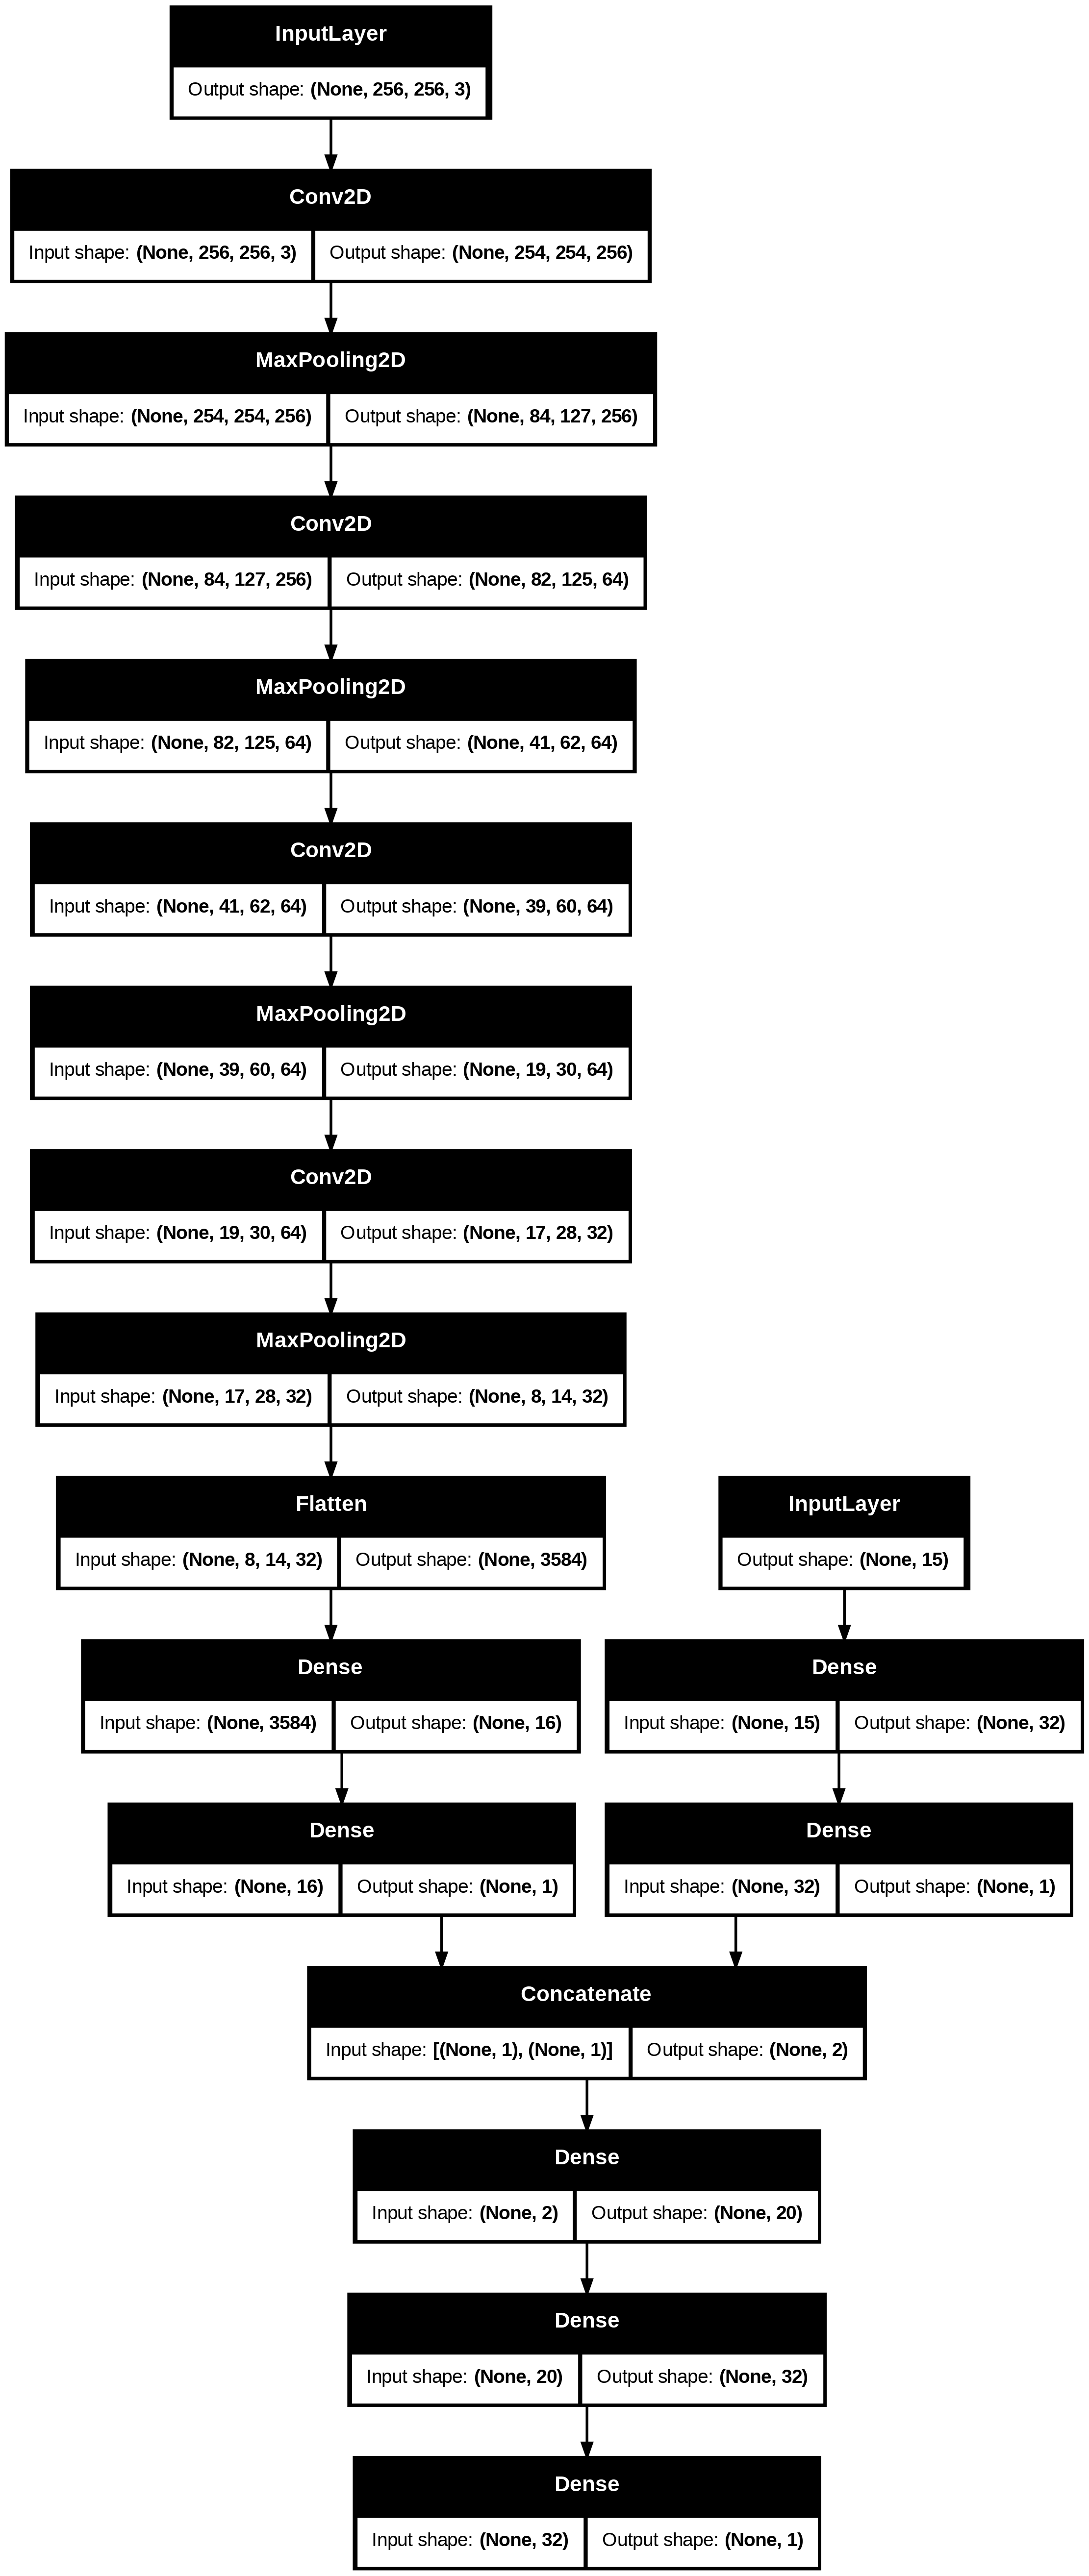

In [40]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

# Finally, evaluate the model on the test set

In [96]:
predicted = model.predict([x_tabular_test, x_images_test])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [97]:
k = 0
for p in predicted.flatten():
  print(f"Model predicted ${int(p)} real ${int(y_test.flatten()[k])}")
  k += 1

Model predicted $224 real $140
Model predicted $116 real $214
Model predicted $118 real $359
Model predicted $113 real $287
Model predicted $321 real $290
